# Visualizing multiband imagery

In this tutorial we're going to begin loading multiband imagery using the python package `rasterio`, and then visualizing these images using `pyplot`.

Today, we going to visualize imagery, either for (i) a single band layer, (ii) as a true composite, or (iii) false composite image.


## Raster graphics

Now we've downloaded our data assets, we need to check that they can be successfully opened. This requires us to access and display the raster graphics style our data are in. 

Importantly, raster graphics are based on a two-dimensional image represented by a rectangular matrix (thus, a grid of square pixels). 

See here for more information: https://en.wikipedia.org/wiki/Raster_graphics

These graphics can then be interpreted by a computer to display the underlaying data as an image. 

It's important to know the difference between vector and raster graphics. Let's watch the following short video to clarify the difference.


In [1]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/-Fs2t6P5AjY" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## Downloading 4-band PlanetScope assets 

You can download a 4-band PlanetScope image from the Planet API. For more details, see here:

https://developers.planet.com/docs/data/psscene/

*PlanetScope 4-band multispectral basic and orthorectified scenes. This data set includes imagery from all PlanetScope sensors. All PSScene4Band items have a corresponding PSScene3Band item.*

The constituent components of an 'analytic' 4-band asset include:

- Band 1 = Blue
- Band 2 = Green
- Band 3 = Red
- Band 4 = Near-infrared

The 'analytic' component refers to this imagery being a radiometrically calibrated GeoTiff product suitable for analytic applications.

A GeoTIFF is essentially a normal Tag Image File Format (TIFF) file with a metadata standard which allows embedded georeferencing information.

https://en.wikipedia.org/wiki/GeoTIFF

## Rasterio

To interpret our asset data we can use `rasterio` to both read and write geospatial raster data. 

You can think of `rasterio` as standing for Raster Input-Output.

The GeoTIFF standard (and other raster formats) are common for geographic information systems to organize and store gridded, or raster, datasets. We are able to use `rasterio` to read and write these formats and then provide a Python API based on N-D arrays.

An ndarray is a (usually fixed-size) multidimensional container of items of the same type and size. Remember we covered an introduction to `numpy` in a previous lecture. Well, `numpy` uses N-D arrays as its basic data structure. `rasterio` heavily uses `numpy` in its operations.   

You can see the GitHub code here: https://github.com/rasterio/rasterio

Or, more usefully, you can access the `rasterio` documentation here: https://rasterio.readthedocs.io/en/latest/

First, we will need to install `rasterio` into our virtual conda environment.

In [2]:
# Example
# Thankfully we can install rasterio into our virtual environment as follows:
# import sys
# !conda install --yes --prefix {sys.prefix} rasterio

Next, we need to load the `rasterio` package into our current environment using the `import` command: 

In [1]:
import rasterio

And now we want to specify the filename for one of the image assets that we have downloaded into our current directory.

In [2]:
# Example
# Here we can specify the name of our Planet PSScene analytic image
filename = "20160831_180303_0e26_3B_AnalyticMS.tif"
filename

'20160831_180303_0e26_3B_AnalyticMS.tif'

Finally, we can load in our downloaded image using `rasterio`, via the open function.

If this is completed successfully, we should be able to print the `rasterio` object and see the following:

```<open DatasetReader name='20221001_154151_08_248f_1B_AnalyticMS.tif' mode='r'>```

Now have a go and see what you produce:

In [4]:
# Example
my_raster_image = rasterio.open(filename)
my_raster_image.read()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

This is now a `rasterio` object, which means we can use a range of the `rasterio` package functions on this object. 

For example, let's unpack these different multiband layers into `numpy` arrays:

In [6]:
# Example
# Unpacking our image layers into separate variables for blue, green, red and infrared:
blue, green, red, nir = my_raster_image.read()
blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

## Single layer imagery

Now we can begin to interact with our underlying image data. 

We will need to download and install `matplotlib` into our virtual environment, in order to acess this package.

In [7]:
# Example
# We will need to install matplotlib into our virtual environment
# import sys
# !conda install --yes --prefix {sys.prefix} matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Anaconda\envs\sia

  added / updated specs:
    - matplotlib


The following packages will be UPDATED:

  ca-certificates    conda-forge::ca-certificates-2022.9.2~ --> pkgs/main::ca-certificates-2023.01.10-haa95532_0 None
  certifi            conda-forge/noarch::certifi-2022.9.24~ --> pkgs/main/win-64::certifi-2022.12.7-py39haa95532_0 None
  openssl            conda-forge::openssl-1.1.1q-h8ffe710_0 --> pkgs/main::openssl-1.1.1t-h2bbff1b_0 None


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




Now `matplotlib` is available, we can begin to play with the individual layers using the `pyplot` function. 

First, we can plot individual bands as images, as follows for the blue band:

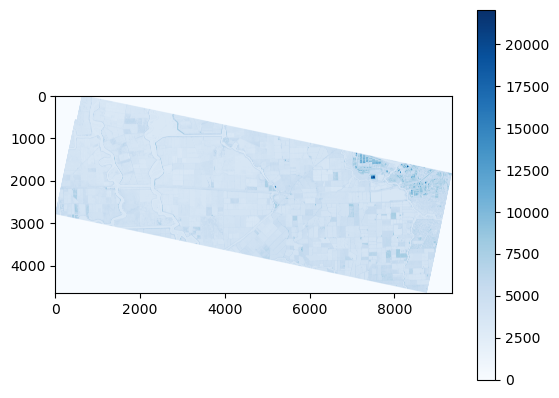

In [7]:
# Example
from matplotlib import pyplot

# Use imshow to load the blue band.
fig = pyplot.imshow(blue, cmap="Blues")

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

Let's inspect our green band:

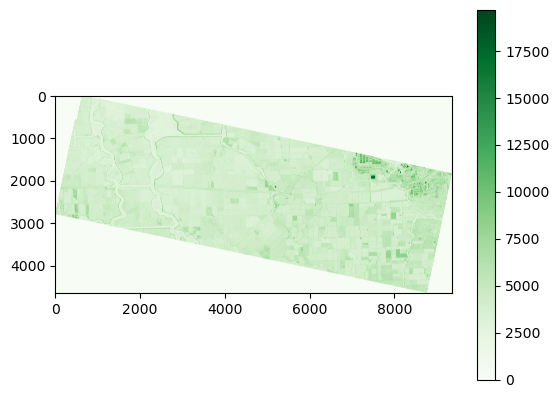

In [8]:
# Example
# Use imshow to load the green band.
fig = pyplot.imshow(green, cmap='Greens')

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

Let's inspect our red band:

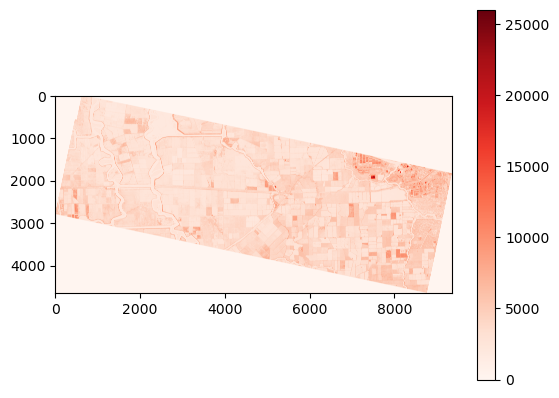

In [9]:
# Example
# Use imshow to load the red band.
fig = pyplot.imshow(red, cmap='Reds')

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

Let's inspect our near-infrared band:

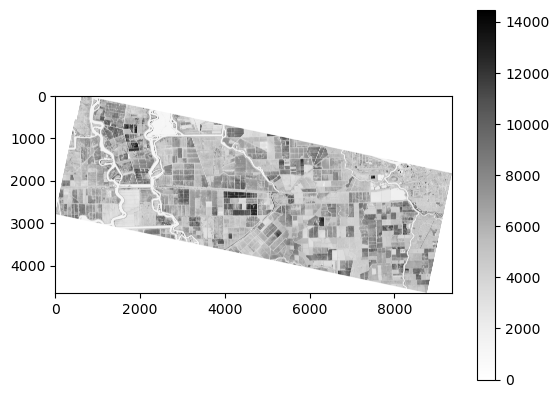

In [10]:
# Example
# Use imshow to load the nir band.
fig = pyplot.imshow(nir, cmap='Greys')

# Add the colorbar to our plot
pyplot.colorbar() 

# Display the results.
pyplot.show()

Having viewed each of those layers, you should reflect on what you see. 

It is also possible to use blended color maps for each layer. 

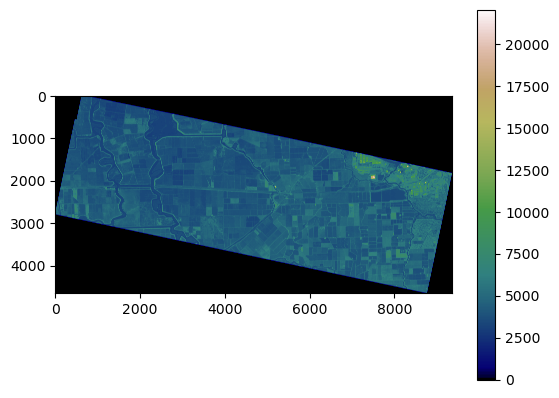

In [11]:
# Example
fig = pyplot.imshow(blue) #create the figure
fig.set_cmap('gist_earth') #set the color map, hence `set_cmap()`
pyplot.colorbar() #add the colorbar to our plot
pyplot.show() #display our image

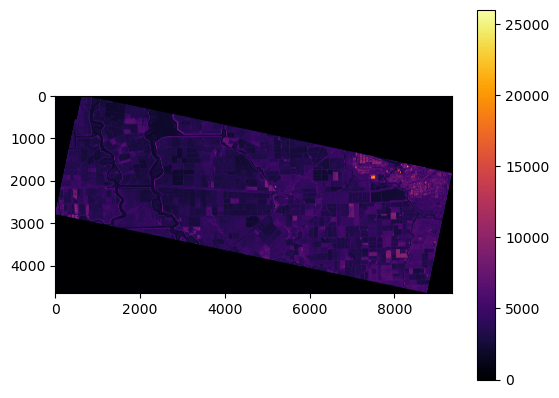

In [12]:
# Example
fig = pyplot.imshow(red) #create the figure
fig.set_cmap('inferno') #set the color map, hence `set_cmap()`
pyplot.colorbar() #add the colorbar to our plot
pyplot.show() #display our image

## Multilayer composite imagery

If we want to plot multiple layers at once, we will need to stack the different bands we want to combine.

For a standard image, we will want to use red, green and blue. 

We will need to scale these bands for display purposes, and we can use `numpy` to help stack them together.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


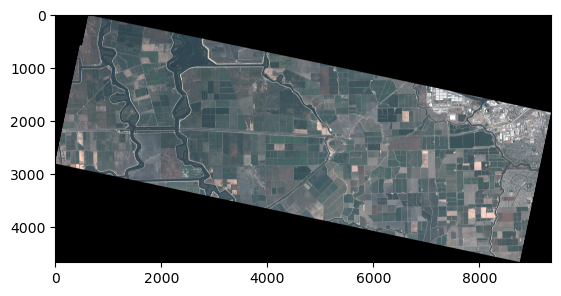

In [13]:
import numpy as np
from matplotlib import pyplot

def scale(band): # scale values for display purposes
    return band / 10000.0

my_raster_image = rasterio.open("20160831_180303_0e26_3B_AnalyticMS.tif")

blue = scale(my_raster_image.read(1))
green = scale(my_raster_image.read(2))
red = scale(my_raster_image.read(3))

rgb = np.dstack((red, green, blue))

pyplot.imshow(rgb)

## Exercise

You are a FEMA Federal Employee and you've just logged into your system. Your manager has emailed and asked you to immediately check the most up-to-date imagery for the Fort Myers area. 

Hurricane Ian caused an immense amount of destruction to homes and infrastructure in this area, and you need to examine the latest imagery to understand damage extent. You know that Estero Island is a damage hotspot.

Download a Planet image via the API for the follow criteria:

- Lon-lat coordinates: -81.9466, 26.4506
- Time period: October 1st-2nd 2022
- Cloud cover: Below 10%

Critically review the imagery you download. 

Collate your code below. Make sure you visualize each band separately below, as well as illustrating a true color composite of your imagery data.

If you complete this task, go find other images to compare your data against. 

In [15]:
# Enter your attempt here
